### Dependencies###


In [25]:
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import json
import numpy as np
from pandas.tools.plotting import scatter_matrix


### Helpful links: ###
http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-morningstar
https://pythonprogramming.net/getting-stock-prices-python-programming-for-finance/

In [61]:
# Retriving Closing Prices from google

stocks = ["FB","AAPL","AMZN","NFLX","GOOG","GLD"]
start = dt(2017, 1, 1)
end = dt(2017, 12, 31)

stocks_data = web.DataReader(stocks, "google", start, end)["Close"]

#df_AAPL = AAPL_df[["Open","Low","High","Close","Volume"]]

stocks_data.head()

/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,AAPL,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,,
2017-01-03,116.15,753.67,116.86,110.47,786.14,127.49
2017-01-04,116.02,757.18,118.69,110.86,786.90,129.41
2017-01-05,116.61,780.45,120.67,112.58,794.02,131.81
2017-01-06,117.91,795.99,123.41,111.75,806.15,131.07
2017-01-09,118.99,796.92,124.90,112.67,806.65,130.95


In [27]:
# Retriving Opening Prices from google

open_stocks_data = web.DataReader(stocks, "google", start, end)["Open"]
open_stocks_data.head()


/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,AAPL,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,,
2017-01-03,115.80,757.92,116.03,109.62,778.81,124.96
2017-01-04,115.85,758.39,117.55,111.06,788.36,127.49
2017-01-05,115.92,761.55,118.86,112.16,786.08,129.22
2017-01-06,116.78,782.36,120.98,111.81,795.26,132.08
2017-01-09,117.95,798.00,123.55,112.39,806.40,131.48


In [62]:
# Retriving Volume of each stock in 2017 from google

volume_stocks_data = web.DataReader(stocks, "google", start, end)["Volume"]
volume_stocks_data.head()

/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,AAPL,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,,
2017-01-03,28781865.0,3521066.0,20663912.0,7527353.0,1657268.0,9437856.0
2017-01-04,21118116.0,2510526.0,19630932.0,4904119.0,1072958.0,7843559.0
2017-01-05,22193587.0,5830068.0,19492150.0,9606761.0,1335167.0,10185516.0
2017-01-06,31751900.0,5986234.0,28545263.0,7686070.0,1640170.0,10657878.0
2017-01-09,33561948.0,3446109.0,22880360.0,5674636.0,1274645.0,5771835.0


#### Daily change in prices for all stocks (Close-Open) ####

In [63]:
# Find the difference in prices:Close-Open

diff_df = stocks_data.subtract(open_stocks_data)
diff_df.head()

,AAPL,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,,
2017-01-03,0.35,-4.25,0.83,0.85,7.33,2.53
2017-01-04,0.17,-1.21,1.14,-0.20,-1.46,1.92
2017-01-05,0.69,18.90,1.81,0.42,7.94,2.59
2017-01-06,1.13,13.63,2.43,-0.06,10.89,-1.01
2017-01-09,1.04,-1.08,1.35,0.28,0.25,-0.53


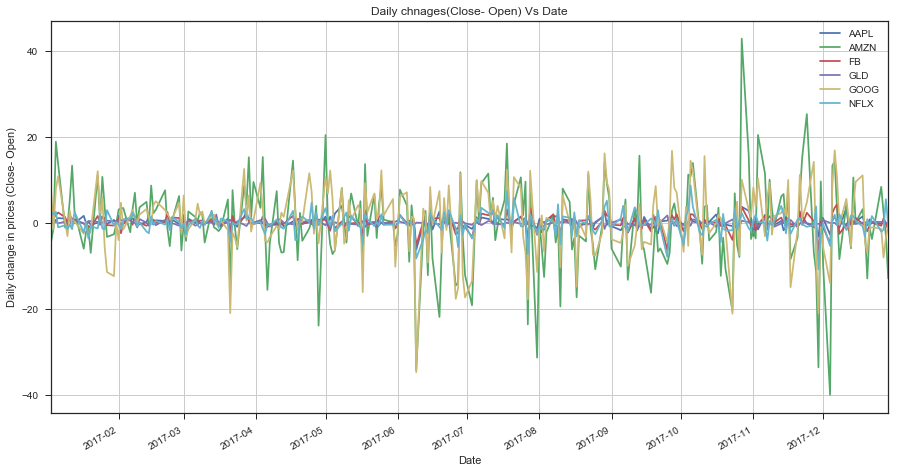

In [29]:
#Plotting th echange in prices for all stocks
diff_df.plot(figsize = (15,8),grid = True)
plt.title("Daily chnages(Close- Open) Vs Date")
plt.ylabel("Daily change in prices (Close- Open)")
plt.show()

In [64]:
"""
diff_df[['AAPL','AMZN','FB','GLD','GOOG','NFLX']].plot(subplots=True,figsize=(15,10),grid=True)
plt.suptitle("Daily chnge in prices")
plt.ylabel("Close-Open")
plt.savefig("diff.png")
plt.show()
"""

'\ndiff_df[[\'AAPL\',\'AMZN\',\'FB\',\'GLD\',\'GOOG\',\'NFLX\']].plot(subplots=True,figsize=(15,10),grid=True)\nplt.suptitle("Daily chnge in prices")\nplt.ylabel("Close-Open")\nplt.savefig("diff.png")\nplt.show()\n'

#### Conclusion ####
From the graph, we noticed that the Google and Amazon stocks are fluctuating a lot.
Amazon goes 40 points higher in the month of Nov,2017 and goes down in 40 points in Dec.


#### To check if all the columns have same number of row. The "count" row in the following table will tell us that ####

In [32]:
stocks_data.describe()

,AAPL,AMZN,FB,GLD,GOOG,NFLX
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,150.551036,968.167012,156.576175,119.704661,921.781434,165.374263
std,14.621232,106.580210,17.379058,3.132584,77.232928,21.295641
min,116.020000,753.670000,116.860000,110.470000,786.140000,127.490000
25%,141.815000,889.025000,141.000000,117.725000,836.995000,144.245000
50%,152.740000,967.990000,153.610000,119.820000,929.570000,162.430000
75%,159.855000,1002.970000,171.975000,121.730000,972.760000,185.595000
max,176.420000,1195.830000,183.030000,128.130000,1077.140000,202.680000


### Subplots for Opening Price for all stocks: ###

In [66]:
"""
open_stocks_data[['AAPL','AMZN','FB','GLD','GOOG','NFLX']].plot(subplots=True,figsize=(12,8))
plt.suptitle("Subplots for Opening prices for stocks")
plt.ylabel("Stock Price")
#ax.set_ylabel("Stock Price")
plt.grid()
plt.savefig("open.png")
plt.show()
"""

'\nopen_stocks_data[[\'AAPL\',\'AMZN\',\'FB\',\'GLD\',\'GOOG\',\'NFLX\']].plot(subplots=True,figsize=(12,8))\nplt.suptitle("Subplots for Opening prices for stocks")\nplt.ylabel("Stock Price")\n#ax.set_ylabel("Stock Price")\nplt.grid()\nplt.savefig("open.png")\nplt.show()\n'

In [67]:
"""

# plot for Closing price

stocks_data.plot(legend = True, figsize = (15,5))
plt.grid()
plt.ylabel("Closing price")
plt.title("Closing Price Vs Date")
plt.savefig("closing.png")
plt.show()
"""

'\n\n# plot for Closing price\n\nstocks_data.plot(legend = True, figsize = (15,5))\nplt.grid()\nplt.ylabel("Closing price")\nplt.title("Closing Price Vs Date")\nplt.savefig("closing.png")\nplt.show()\n'

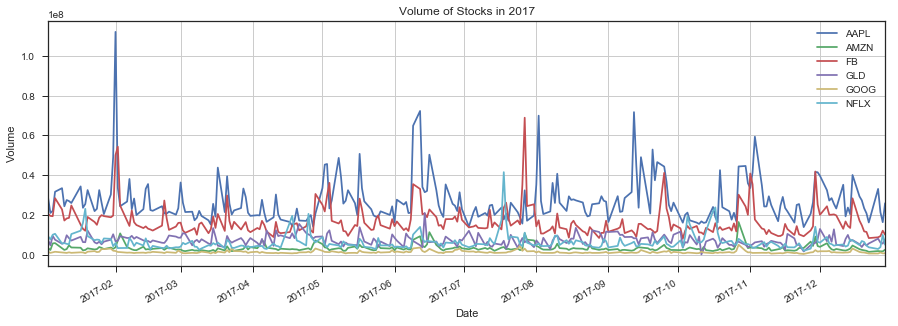

In [35]:
# plot for Volume 

volume_stocks_data.plot(legend = True, figsize = (15,5))
plt.grid()
plt.ylabel("Volume")
plt.title("Volume of Stocks in 2017")
plt.savefig("volume.png")

plt.show()

In [ ]:
#Converting dataframe into stocks_data.csv

stocks_data.to_csv("stocks_data.csv")

### Why buyig a  Gold stock is recommended ?? ###

#### Correlation matrix of all stocks on "Close" prices ####
By plotting correlation matrix, we could see how the closingprices of various stocks in the list are correlated.


In [36]:
# FInding the correlation between the Closing prices of the stocks
corr_stocks = stocks_data
corr_stocks = stocks_data.corr()
corr_stocks.head()

,AAPL,AMZN,FB,GLD,GOOG,NFLX
AAPL,1.000000,0.909549,0.933798,0.689384,0.895990,0.870915
AMZN,0.909549,1.000000,0.880898,0.490556,0.956621,0.836663
FB,0.933798,0.880898,1.000000,0.700722,0.894067,0.957883
GLD,0.689384,0.490556,0.700722,1.000000,0.497676,0.648155
GOOG,0.895990,0.956621,0.894067,0.497676,1.000000,0.876817


/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


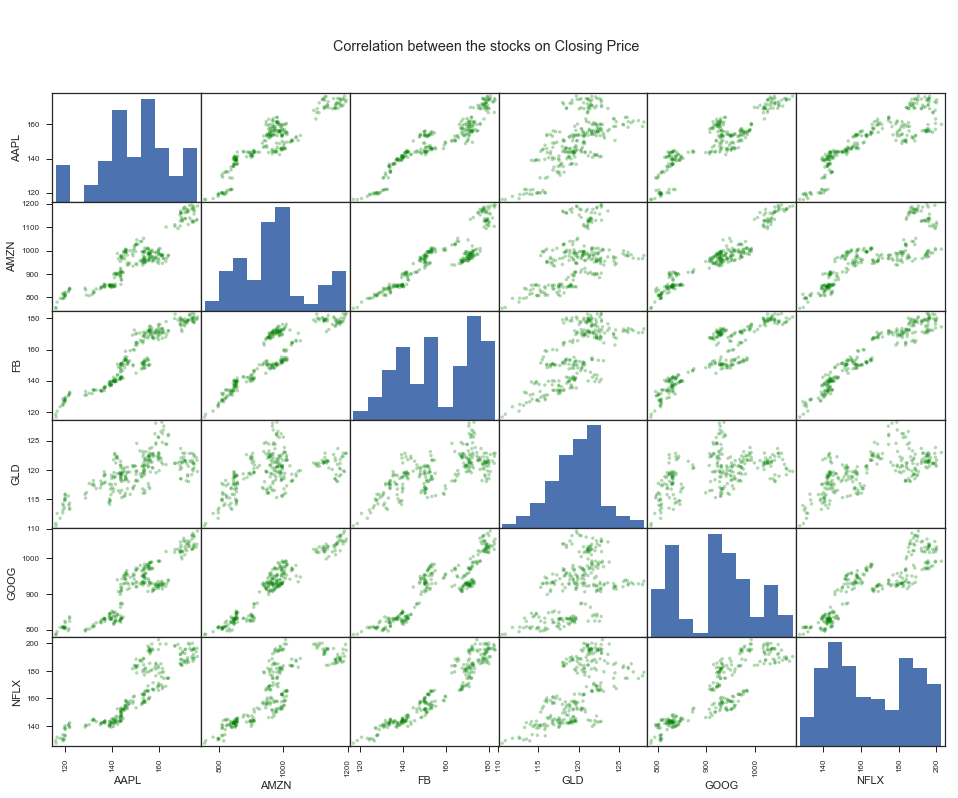

In [37]:
# plotting scatter matrix to see the correlation between the stocks on "Close" price

from pandas.tools.plotting import scatter_matrix

scatter_matrix(stocks_data, alpha = 0.3, figsize=(16,12),color = "green")
plt.suptitle("\n\n Correlation between the stocks on Closing Price")
plt.ylabel("Stock Price")
plt.savefig("stocksdata_scattermatrix.png")
plt.show()


#### Close look at one of the cells of correlation matrix: GLD and AAPL

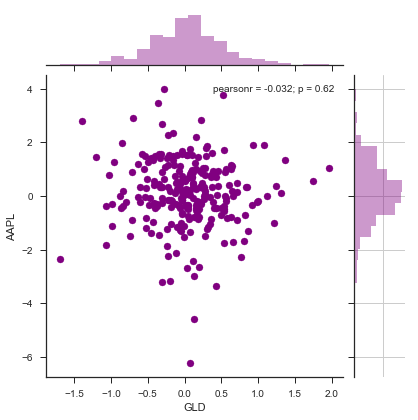

In [85]:
# Close look for 
import seaborn as sns
sns.jointplot('GLD','AAPL',diff_df,kind='scatter',color = 'purple')
plt.grid()
plt.savefig("aaplgld.png")
plt.show()

#### Observations: ####
From the matrix, it is pretty clear that the Closing Prices of the stocks do depend on one another.
FB prices are strongly positively correlated to AAPL,AMZN,GOOG and NFXL,except GLD.
In fact, all tech stocks are more or less positively correlated to each other whereas the Gold(GLD) prices are not getting affected by the prices of the other Tech stocks. <p>
This indicates that there is a weak ocrrelation between GLD and other stocks in the list. So, buying GLD stocks will be a good idea to have a well-balanced portfiolio.


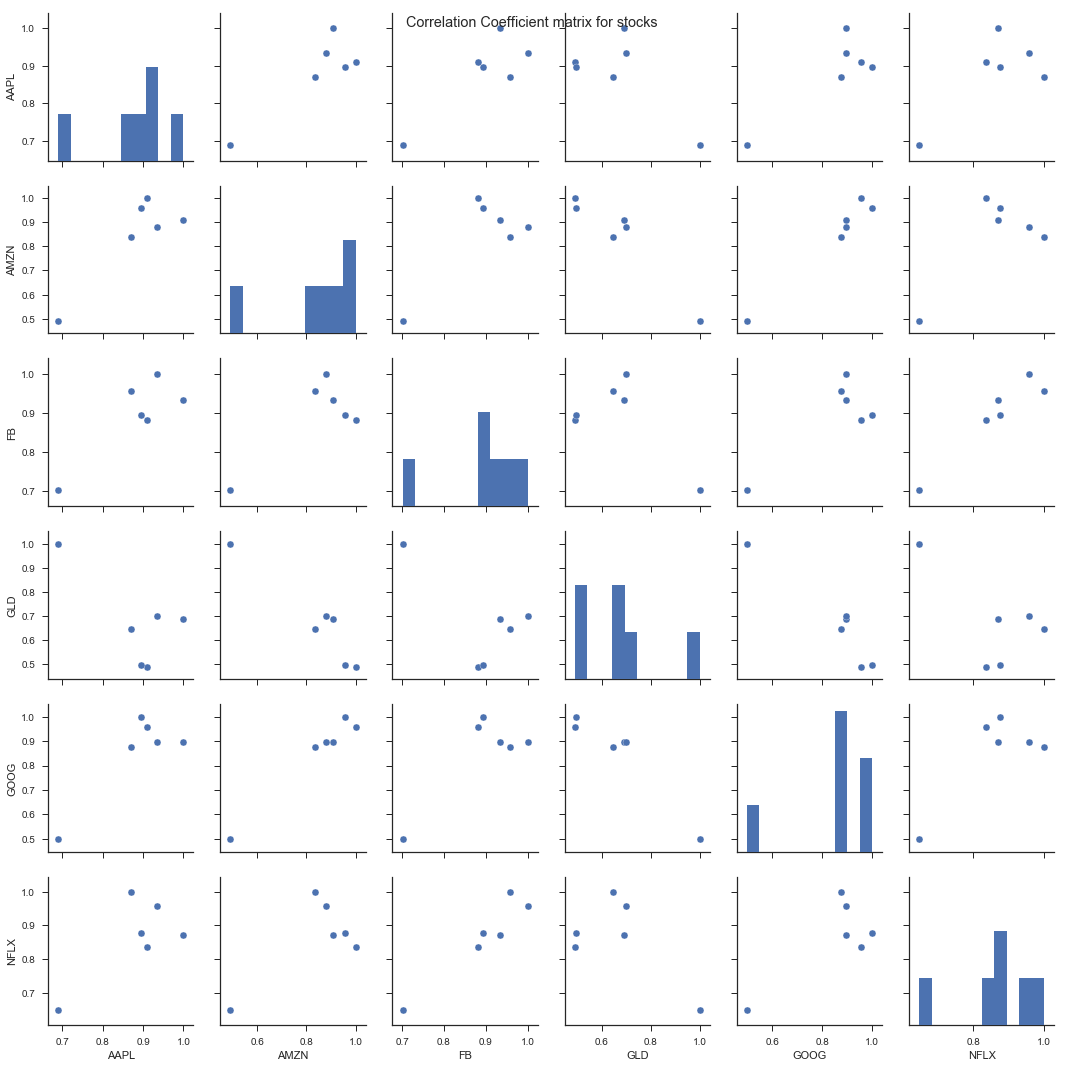

In [40]:
#plotting pair plot for correlation dataframe "corr_stocks"

import seaborn as sns
sns.set(style="ticks")
sns.pairplot(corr_stocks) 
plt.suptitle("Correlation Coefficient matrix for stocks ")
plt.savefig("corrstocks_pairplot.png")
plt.show()

In [102]:
percent_return = stocks_data.pct_change()
#percent_return.head()
percent_return= percent_return.dropna()
percent_return.head()

,AAPL,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,,
2017-01-04,-0.001119,0.004657,0.015660,0.003530,0.000967,0.015060
2017-01-05,0.005085,0.030732,0.016682,0.015515,0.009048,0.018546
2017-01-06,0.011148,0.019912,0.022707,-0.007373,0.015277,-0.005614
2017-01-09,0.009160,0.001168,0.012074,0.008233,0.000620,-0.000916
2017-01-10,0.001008,-0.001280,-0.004404,0.004260,-0.002306,-0.008095


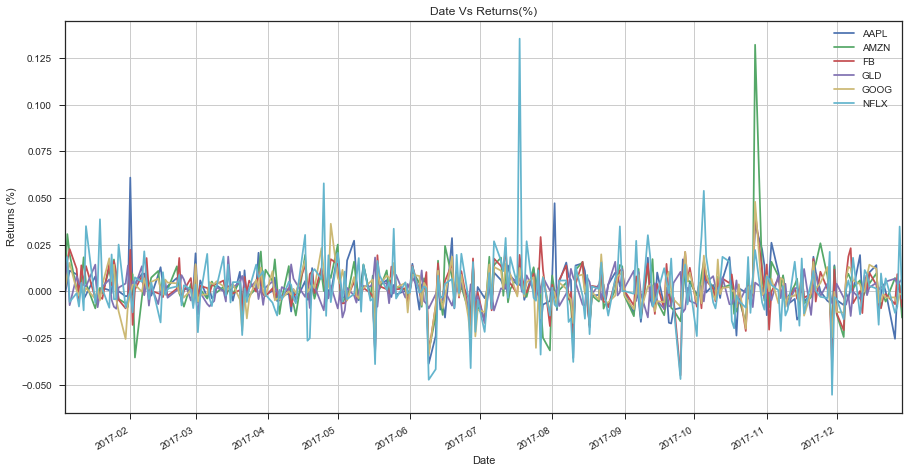

In [103]:
percent_return.plot(legend = True, figsize = (15,8))
#per_rets[['AAPL','AMZN','FB','GLD','GOOG','NFLX']].plot(subplots=True,figsize=(12,8))
plt.grid()
plt.title("Date Vs Returns(%)")
plt.ylabel("Returns (%)")
plt.show()

### Value at Risk: 

#### Value at Risk is the measure of the Risk of loss for investment. It estimates how much a set of invesment might loose in a set time period in normal market conditions.

#### How much value do put at risk by investing in a perticular stock??####

#### We will find the risk by comparing expected return with the standard deviation of the daily returns.
#### Expected return is nothing but the mean of the stock’s daily returns.
#### We wil use various functions of pa


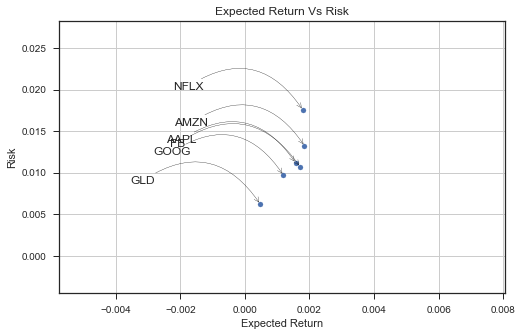

In [104]:
plt.figure(figsize=(8,5))
plt.scatter(percent_return.mean(),percent_return.std(),s=25)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.grid()
for label,x,y in zip(percent_return.columns,percent_return.mean(),percent_return.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-130,20),
    textcoords = 'offset points',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-.5'))
plt.title("Expected Return Vs Risk")    
plt.show()

### Risk Analysis: ###

#### We want high return, low risk stocks. 
#### GLD seems to be the low risk low return socks in the entire list. 
#### GOOG is the low risk low return in tech stock whereas NFLX has the highest return with highest risk. 
#### Risk and returns for FB and AAPL are almost the same.

### ---------------------------------------------------------------------------------------------------------------------------###

### Let's analyse the performance of the  individual stock: AAPL ###

##### We'll  analyze  AAPL  to start with . The process will be the same for the rest of them####



####  Here are the dataframes and the plots  for AAPL Open and Closing prices and it's daily changes for the yea 2017 ####

In [105]:
# Getting the AAPL data from google. Find the difference between Close and Open prices

AAPL_stocks_data = web.DataReader("AAPL", "google", start, end)
AAPL_stocks_data["diff"] = AAPL_stocks_data["Close"]-AAPL_stocks_data["Open"]

AAPL_stocks_data.head()

/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,Open,High,Low,Close,Volume,diff
Date,,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865,0.35
2017-01-04,115.85,116.51,115.75,116.02,21118116,0.17
2017-01-05,115.92,116.86,115.81,116.61,22193587,0.69
2017-01-06,116.78,118.16,116.47,117.91,31751900,1.13
2017-01-09,117.95,119.43,117.94,118.99,33561948,1.04


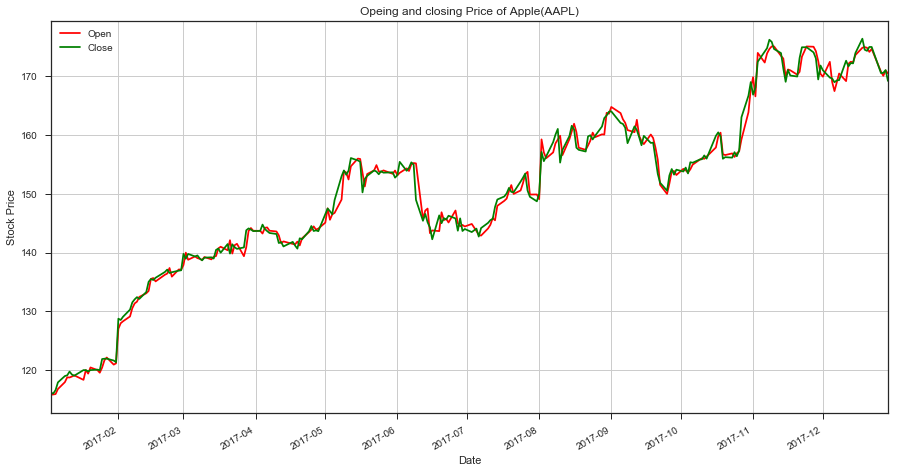

In [106]:

AAPL_stocks_data["Open"].plot(legend = True,color = "red",figsize = (15,8))
AAPL_stocks_data["Close"].plot(legend = True, color = "green", figsize = (15,8))
plt.ylabel("Stock Price")
plt.title("Opeing and closing Price of Apple(AAPL)")
plt.grid()
plt.savefig("aaplopenclose.png")
plt.show()

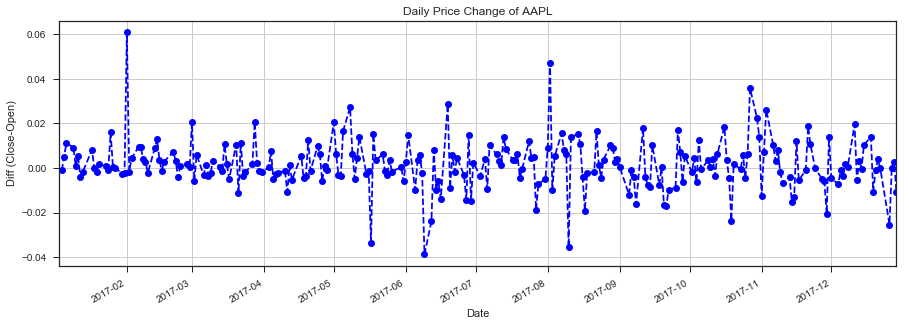

In [107]:
# Daily % return
percent_return = AAPL_stocks_data["Close"].pct_change()
percent_return.plot(figsize = (15,5),color = "blue",linestyle = "--",marker = "o",grid = True)
plt.ylabel("Diff (Close-Open)")
plt.title("Daily Price Change of AAPL")
plt.show()

In [108]:
"""
AAPL_stocks_data[['Open','Close','diff']].plot(subplots=True,figsize=(12,5),grid = True)
plt.title("Opening and Closing Prices for AAPL")
plt.savefig("openClose.png")
plt.show()
"""

'\nAAPL_stocks_data[[\'Open\',\'Close\',\'diff\']].plot(subplots=True,figsize=(12,5),grid = True)\nplt.title("Opening and Closing Prices for AAPL")\nplt.savefig("openClose.png")\nplt.show()\n'

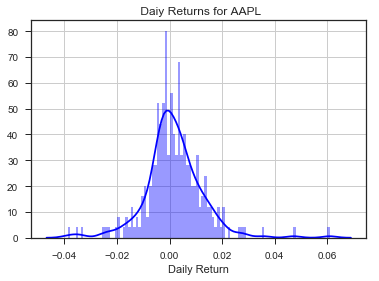

In [117]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(percent_return.dropna(),color='blue',bins = 100)
plt.xlabel("Daily Return")
plt.title(" Daiy Returns for AAPL")
plt.grid()
plt.show()

####  It looks like AAPL has more positive daily retuns than the negative


### ------------------------------------------------------------------------------------------------###




### Moving Averages for AAPL: ###

#### Moving average is the technique to get an overall idea of the trend in the data set.
#### It is exptremly useful in forecasting the long-term trend.


In [118]:
# Finding Moving averages for AAPL

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL_stocks_data[column_name] = AAPL_stocks_data['Close'].rolling(window=ma,center=False).mean()
AAPL_stocks_data.tail()

,Open,High,Low,Close,Volume,diff,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2017-12-22,174.68,175.42,174.50,175.01,16349444,0.33,173.816,172.2420,169.0422
2017-12-26,170.80,171.47,169.68,170.57,33185536,-0.23,173.606,172.0660,169.3138
2017-12-27,170.10,170.78,169.71,170.60,21498213,0.50,173.496,171.9425,169.5282
2017-12-28,171.00,171.85,170.48,171.08,16480187,0.08,173.377,172.0225,169.7404
2017-12-29,170.52,170.59,169.22,169.23,25999922,-1.29,173.078,171.8915,169.9298


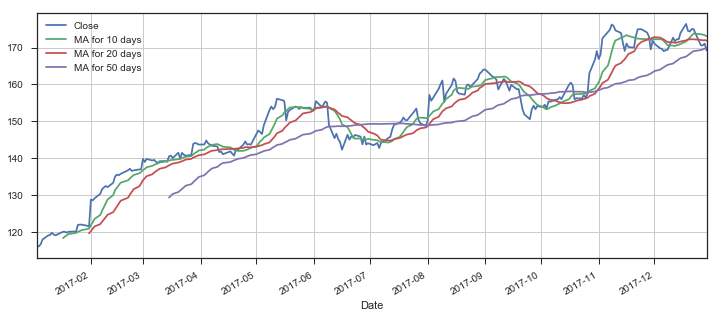

In [127]:
AAPL_stocks_data[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5),grid = True)
plt.savefig("aaaplmoveavg.png")
plt.show()

In [125]:
# Retriving data to check the stock price for AAPL stock price for 2018 to check how accurate our prediction is.
start = dt(2018, 1, 1)
end = dt(2018, 1, 31)

yr2018_stocks_data = web.DataReader("AAPL", "google", start, end)
yr2018_stocks_data.head()

/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,170.16,172.30,169.26,172.26,25555934
2018-01-03,172.53,174.55,171.96,172.23,29517899
2018-01-04,172.54,173.47,172.08,173.03,22434597
2018-01-05,173.44,175.37,173.05,175.00,23660018
2018-01-08,174.35,175.61,173.93,174.35,20567766




### Prediction of AAPL Closing price for 2018 using data for 2017 using MA method:###


#### Ref: check out AAPL_stocks_data ( for moving avarage data),  and,  yr2018_stocks_data (for January '2018 data)####


#### Predicited AAPL Closing Price( using 2017 data) by calulating 10-day,20-day and 50-day Moving Average method: 173.816, 173.816, 173.816 respctively.

#### Actual Closing Price in Jan: 172.26


#### Prediction for APPL Closing Price is quite close the actual price to what we have predicted from  the data for the year 2017.

### -------------------------------------------------------------------------------------------------------------###

### RIsk Analysis/Value at Risk for AAPL:

#### we are using the Bootstrap method to determine this.


In [99]:
# finding quantile:
percent_return['AAPL'].quantile(0.05)

-0.014949089310054071

#### #### Monte Carlo Simulation ####
Monte Carlo simulation can be done to predict how the stocks can perform in the future